In [50]:
# 라이브러리 업로드
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gs

#plotly
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs,plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

#folium
import folium

In [51]:
# covid19 데이터(data)
df= pd.read_csv('covid_19_data.csv')

In [52]:
# 데이터 전처리 (Wide-Form)
df = df.rename(columns={'Country/Region':'Country'})
df = df.rename(columns={'ObservationDate':'Date'})

df['Province/State'] = df['Province/State'].fillna("Unknown")
df = df.rename(columns = {"Province/State":"State"})
df = df.rename(columns = {"Country/Region":"Country"})
df[['Confirmed','Deaths','Recovered']] = df[['Confirmed','Deaths','Recovered']].astype(int)


#Active 칼럼 추가
df['Active'] = df['Confirmed']-df['Deaths']-df['Recovered']
df.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered,Active
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0,1
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0,14
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,6
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0,1
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0,0


In [111]:
# 데이터 전처기 (Long-Form)
tmp = pd.DataFrame(df.drop(['Confirmed','Deaths','Recovered', 'Active'], axis=1))
base_col = tmp.columns.tolist()

tmp1 = pd.DataFrame(df[base_col+['Confirmed']])
tmp2 = pd.DataFrame(df[base_col+['Deaths']])
tmp3 = pd.DataFrame(df[base_col+['Recovered']])
tmp4 = pd.DataFrame(df[base_col+['Active']])
tmp1["Category"] = "Confirmed"
tmp2["Category"] = "Deaths"
tmp3["Category"] = "Recovered"
tmp4["Category"] = "Active"
tmp1.columns = base_col+["Count","Category"]
tmp2.columns = base_col+["Count","Category"]
tmp3.columns = base_col+["Count","Category"]
tmp4.columns = base_col+["Count","Category"]

long_df = pd.concat([tmp1, tmp2, tmp3, tmp4])
long_df.head()

,SNo,Date,State,Country,Last Update,Count,Category
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,Confirmed
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,Confirmed
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,Confirmed
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,Confirmed
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,Confirmed


## <span style="color:blue"> Bar charts</span>

#### 1. Long Form Data (Plotly)

In [121]:
# 나라별 확진자, 사망자, 완치자 합계 비율 Long-Form
bar1_long = pd.DataFrame(long_df[long_df["Category"]!="Active"]\
                         .groupby(['Country', 'Category'])["Count"].sum().reset_index())
bar1_long.head()

,Country,Category,Count
0,Azerbaijan,Confirmed,1
1,Azerbaijan,Deaths,0
2,Azerbaijan,Recovered,0
3,"('St. Martin',)",Confirmed,2
4,"('St. Martin',)",Deaths,0


In [132]:
fig = px.bar(bar1_long, x="Country", y="Count", color="Category",\
             title="국가별 확진자, 사망자, 완치자 합계")
fig.show()

#### 2. Wide Form Data (Plotly)

In [130]:
# 나라별 확진자, 사망자, 완치자 합계 비율 Wide-Form
bar1_wide = pd.DataFrame(df.groupby("Country")[["Confirmed","Deaths","Recovered"]].sum().reset_index())
bar1_wide.head()

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1,0,0
1,"('St. Martin',)",2,0,0
2,Afghanistan,17026442,669075,13464399
3,Albania,19768869,375955,13945256
4,Algeria,27684358,834464,18959299


In [134]:
fig = px.bar(bar1_wide, x="Country", y=["Confirmed","Deaths","Recovered"],\
             title="국가별 확진자, 사망자, 완치자 합계", labels={"value":"Count", "variable":"Category"})
fig.show()

#### 3. wide-form, long-form 비교 분석 <span style="color:skyblue">(Plotly)</span>
  
wide-form에서는 y축 변수를 직접 지정해줘야 한다.  
즉, 범주가 많은 경우 long-form이 더 편함

#### 4. Long Form Data (Seaborn)

In [135]:
bar1_long.head()

,Country,Category,Count
0,Azerbaijan,Confirmed,1
1,Azerbaijan,Deaths,0
2,Azerbaijan,Recovered,0
3,"('St. Martin',)",Confirmed,2
4,"('St. Martin',)",Deaths,0


<Figure size 72000x36000 with 0 Axes>

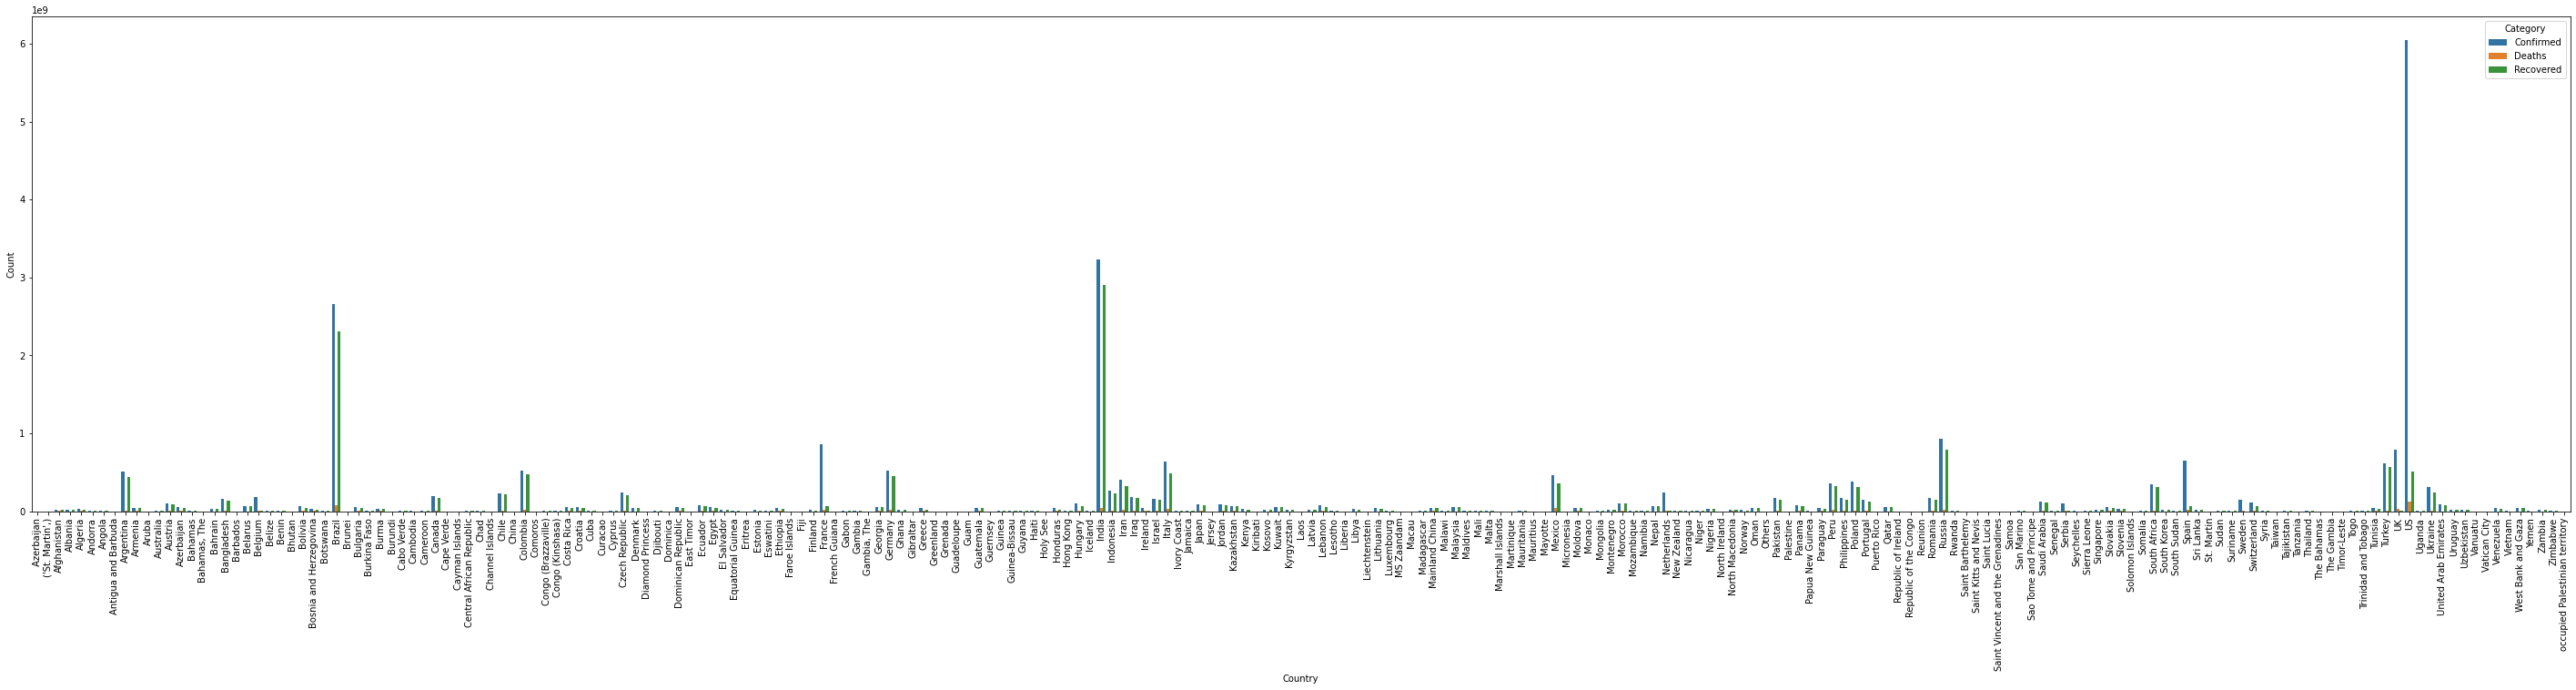

<Figure size 72000x36000 with 0 Axes>

In [163]:
bar = sns.barplot(x="Country",  y="Count", hue="Category", data=bar1_long)
plt.xticks(rotation=90)
plt.title="Confirmed, Deaths, Recovered by Country"
plt.figure(figsize=(1000,500))

<Figure size 72000x36000 with 0 Axes>

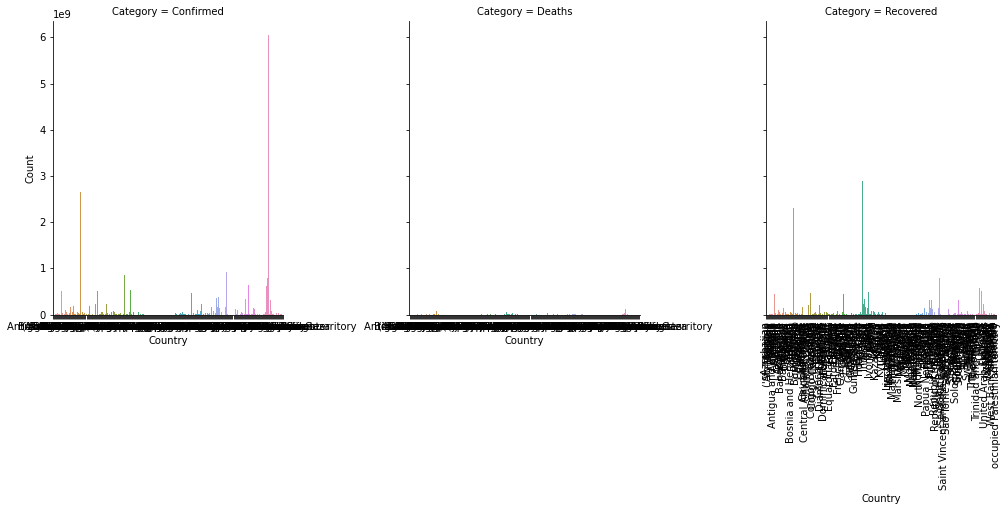

<Figure size 72000x36000 with 0 Axes>

In [168]:
bar2 = sns.catplot(x="Country", y="Count", data=bar1_long, col="Category", kind="bar")
plt.xticks(rotation=90)
plt.title="Confirmed, Deaths, Recovered by Country"
plt.figure(figsize=(1000,500))

#### 5. wide-form, long-form 비교 분석 <span style="color:pink">(Seaborn)</span>

Seaborn의 경우 long-form에서는 hue를 이용하여 범주별 그래프를 그리기 편했다.  
하지만 wide-form에서는 y변수가 여러 개인 경우가 허용이 안되기 때문에 그릴 수 없다.

#### 6. Plotly와 Seaborn 비교

**<span style="color:skyblue">plotly</span>**
---
Plotly의 경우 x축의 길이가 너무 길거나 데이터가 촘촘한 경우 확대해서 보거나 일부분만 잘라서 볼 수 있기 때문에 편하다.  
  
**<span style="color:pink">Seaborn</span>**
---
Seaborn은 long-form의 경우 문법도 간단하고 sub-plots 기능을 제공해서 그래프를 한 눈에 보기에 편했다.하지만 그래프에 한글을 사용하기 복잡한 점과 x라벨 기울기와 x축 길이(그래프 가로 길이)를 수동으로 조절해줘야 하는 것, 정확한 y 값을 보기 어렵다는 점이 Plotly에 비해 안좋았다.